## Project: Investigating Netflix Movies and Guest Stars in The Office

# 1. Loading friend's data into a dictionary

Netflix! What started in 1997 as a DVD rental service has since exploded into the largest entertainment/media company by market capitalization, boasting over 200 million subscribers as of January 2021.



In [12]:
# Create the years and durations lists
years = [i for i in range(2011, 2021)]
durations = [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]

# Create a dictionary with the two lists
movie_dict = {'years': years,
              'durations' : durations
             }

# Print the dictionary
movie_dict

{'years': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
 'durations': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}

## 2. Creating a DataFrame from a dictionary

In [13]:
# Import pandas under its usual alias
import pandas as pd

# Create a DataFrame from the dictionary
durations_df = pd.DataFrame(movie_dict)

# Print the DataFrame
durations_df

,years,durations
0,2011,103
1,2012,101
2,2013,99
3,2014,100
4,2015,100
5,2016,95
6,2017,95
7,2018,96
8,2019,93
9,2020,90


## 3. A visual inspection of our data

[]

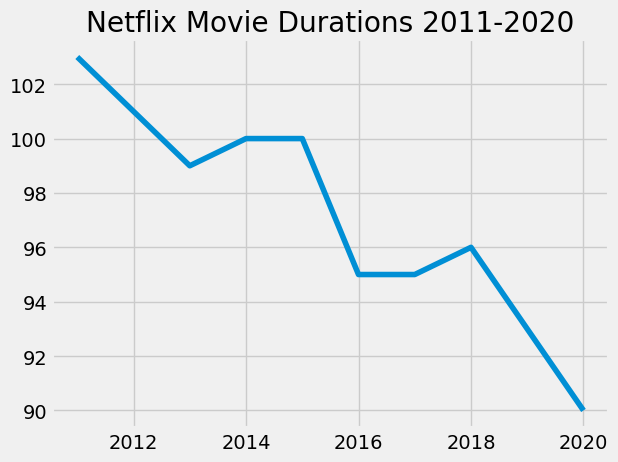

In [14]:
# Import matplotlib.pyplot under its usual alias and create a figure
import matplotlib.pyplot as plt
fig = plt.figure()

# Draw a line plot of release_years and durations
plt.plot(durations_df["years"], durations_df['durations'])

# Create a title
plt.title('Netflix Movie Durations 2011-2020')

# Show the plot
plt.plot()

## 4. Loading the rest of the data from a CSV
Well, it looks like there is something to the idea that movie lengths have decreased over the past ten years!

In [15]:
netflix_df = pd.read_csv('/Users/yogeshdhaliya/Desktop/Projects/Netflix EDA/Netlix.EDA/netflix_data.csv')
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


## 5. Filtering for movies!

In [16]:
# Subset the DataFrame for type "Movie"
netflix_df_movies_only = netflix_df[netflix_df['type'] == 'Movie']

# Select only the columns of interest
netflix_movies_col_subset = netflix_df_movies_only[['title','country','genre','release_year','duration']]

# Print the first five rows of the new DataFrame
netflix_movies_col_subset.head()

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


## 6. Creating a scatter plot

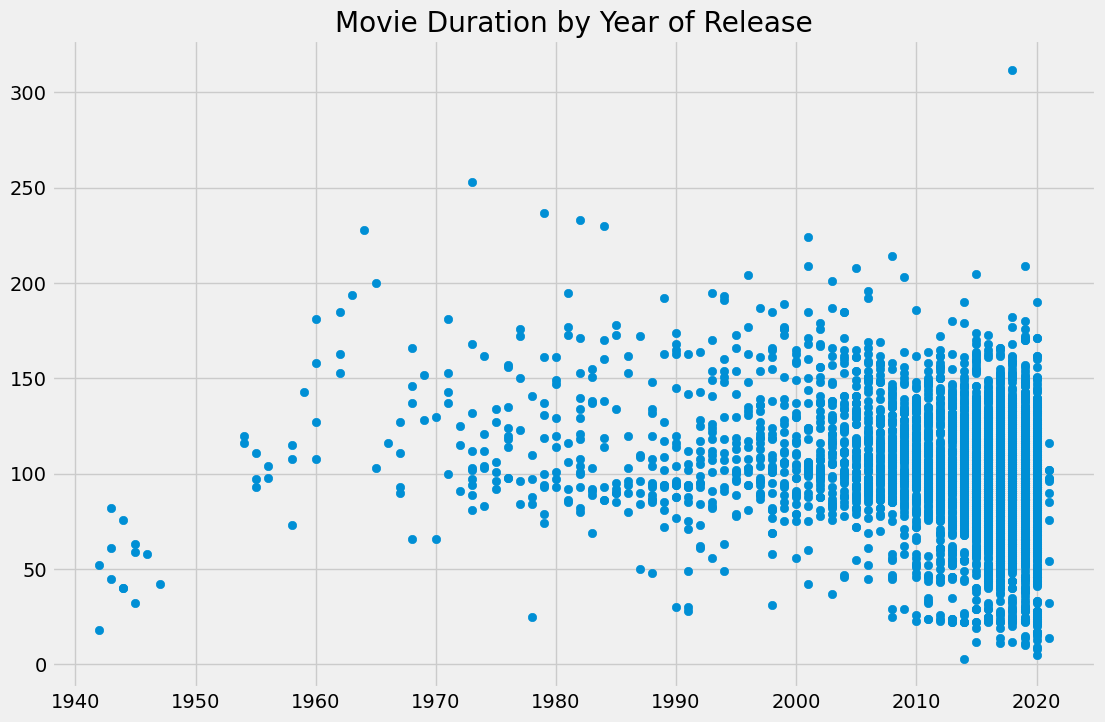

In [17]:
# Create a figure and increase the figure size
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus year
plt.scatter(netflix_movies_col_subset['release_year'], netflix_movies_col_subset['duration'])

# Create a title
plt.title("Movie Duration by Year of Release")

# Show the plot
plt.show()

In [18]:
# Filter for durations shorter than 60 minutes
short_movies = netflix_movies_col_subset[netflix_movies_col_subset['duration'] < 60]

# Print the first 20 rows of short_movies
short_movies.head(20)

,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28
162,A Christmas Special: Miraculous: Tales of Lady...,France,Uncategorized,2016,22
171,A Family Reunion Christmas,United States,Uncategorized,2019,29
177,A Go! Go! Cory Carson Christmas,United States,Children,2020,22
178,A Go! Go! Cory Carson Halloween,NaN,Children,2020,22
179,A Go! Go! Cory Carson Summer Camp,NaN,Children,2020,21


## 8. Marking non-feature films
Interesting! It looks as though many of the films that are under 60 minutes fall into genres such as "Children", "Stand-Up", and "Documentaries". This is a logical result, as these types of films are probably often shorter than 90 minute Hollywood blockbuster.

In [19]:
# Define an empty list
colors = []

# Iterate over rows of netflix_movies_col_subset
for idx, row in netflix_movies_col_subset.iterrows():
    if row['genre'] == 'Children':
        colors.append('red')
    elif row['genre'] == 'Documentaries':
        colors.append('blue')
    elif row['genre'] == 'Stand-Up':
        colors.append('green')
    else:
        colors.append('black')
        
# Inspect the first 10 values in your list        
print(colors[:10])

['black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'blue']


## 9. Plotting with color!

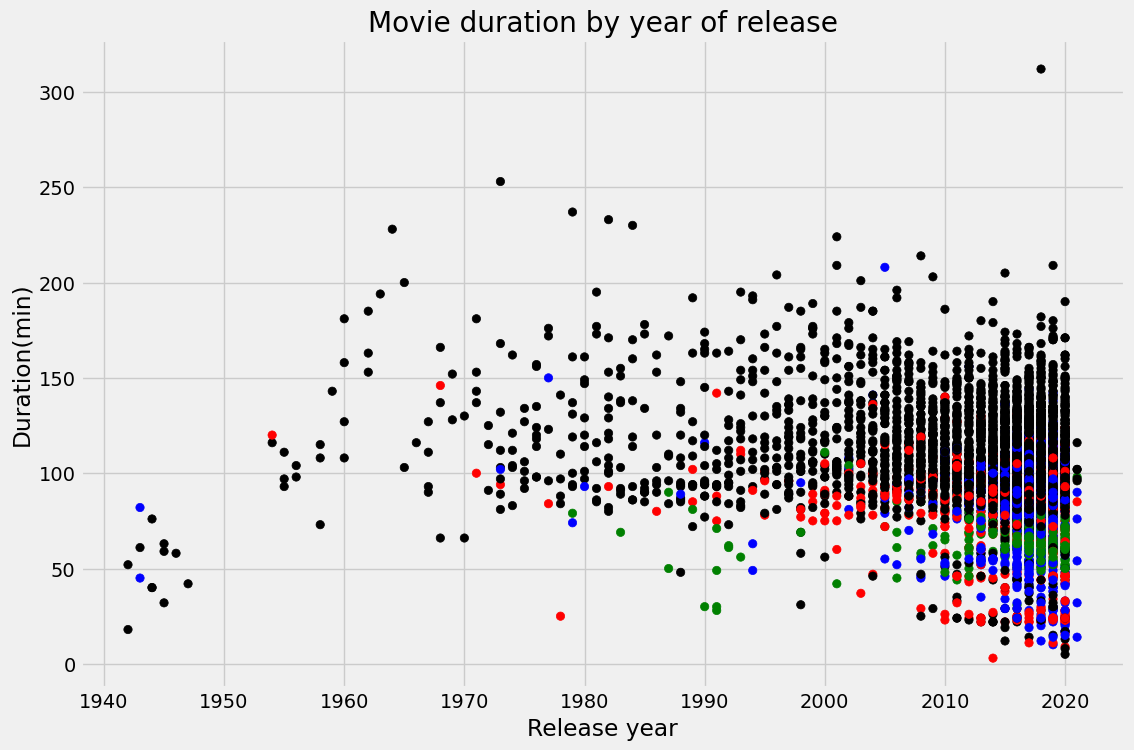

In [20]:
# Set the figure style and initalize a new figure
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus release_year
plt.scatter(netflix_movies_col_subset['release_year'], netflix_movies_col_subset['duration'], color=colors)

# Create a title and axis labels
plt.title('Movie duration by year of release')
plt.xlabel('Release year')
plt.ylabel('Duration(min)')

# Show the plot
plt.show()

## 10. What next?
Well, as we suspected, non-typical genres such as children's movies and documentaries are all clustered around the bottom half of the plot. But we can't know for certain until we perform additional analyses.

In [21]:
# Are we certain that movies are getting shorter?
are_movies_getting_shorter = "No, that is not entirely accurate. By analyzing the scatter plot graph, we can observe that the majority of movie durations fall within the range of 60 to 180 minutes. However, it is noteworthy that there has been a significant increase in the number of movies with durations less than 60 minutes since 2010."
print(are_movies_getting_shorter)

No, that is not entirely accurate. By analyzing the scatter plot graph, we can observe that the majority of movie durations fall within the range of 60 to 180 minutes. However, it is noteworthy that there has been a significant increase in the number of movies with durations less than 60 minutes since 2010.


## Are we certain that movies are getting shorter?

No, that is not entirely accurate. By analyzing the scatter plot graph, we can observe that the majority of movie durations fall within the range of 60 to 180 minutes. However, it is noteworthy that there has been a significant increase in the number of movies with durations less than 60 minutes since 2010.